<a href="https://colab.research.google.com/github/bosunKwak/BigData/blob/main/overall_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기본적인 흐름

<center><img width="500" alt="스크린샷 2022-04-18 오후 4 37 29" src="https://user-images.githubusercontent.com/87002218/163774262-7df26e60-6892-45f4-8c25-e2bf7bd68136.png"></center>



1. 데이터를 학습할 때, 크게 세 부분으로 나눔
- trainset(+ validation), testset
   - trainset, validation set : 모델을 학습하는 과정에서 사용
   - testset : 모델 성능 평가할 때 사용 <br>

<br>

2. Model을 함수로 볼 수 있음 <br>
 y hat = f( X, w)
- parameter를 찾는 것 == 학습을 한다
- X : data
- y hat : 예측값

<br>

3. 예측값이 잘 예측이 됐는지 평가
L(y,y hat)
- L (Loss function) : 실제 값과 예측값이 얼마나 차이나는지 정의해주는 함수
- 오차/ 에러를 측정하는 방법을 정의해주어야 함 

<br>

4. 예측값이 실제값과의 차이가 적도록 계속해서 학습을 시켜줌
- Loss가 가장 작아질때의 Parameter를 찾아줌  == train이 됨

<br>

5. train이 다 됐다(== parameter를 찾았다)라고 판단이 되면,<br>
train이 된 모델(y hat = f(X,w))을 최종적으로 testset을 대입하여 <br>
예측값과 실제 testset 값 차이 비교

# The Overall Process
1. Data prepartion stage
  - 1) Load data
    - built-in classes : Dataset, Sampler, DataLoader
  - 2) Transform (convert it to numeric values)
  - 3) Batching (batch 단위로 묶음)

2. Model Development stage
  - 1) Design 
  - 2) Training 
    - (weight 값을 찾는 것 == 학습을 시킴)
    - 예측한 결과와 실제 나온 결과의 오차가 가장 minimum 하도록
  - 3) Testing
  - Pytorch의 경우 "torch.nn" module 사용
  - Separate dataset into 3 parts : training, validation, testing
  - Define a loss function and optimizer
  - Backpropagating and Update

3. Model Deployment stage
  - File에 저장하거나 배포

## 1.Data Preparation Stage


### 1) Data Loading
Example(CIFAR-10)

In [1]:
# torchvision : 이미지 관련된 model이나 model 관련 dataset들이 들어있는 모듈
from torchvision.datasets import CIFAR10

# 파일 다운
train_data = CIFAR10(root="./train/",
                    train=True, 
                    download=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./train/cifar-10-python.tar.gz to ./train/


In [2]:
# data 확인
print(train_data)

# data 길이(개수)
print(len(train_data)) # out: 50000

# 차원
print(train_data.data.shape) 
#(50000, 32, 32, 3)  - 50000개의 set, 32 x 32 인 color image가 3개의 channel로 있음

# target : label (분류하고자하는 정답)
#print(train_data.targets) # list. 너무 많아서 생략. 

# 각 class 이름
print(train_data.classes)

# class가 target에 어떻게 매핑되는지 확인
print(train_data.class_to_idx)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./train/
    Split: Train
50000
(50000, 32, 32, 3)
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}


In [3]:
# 첫번째 train data의 type
print(type(train_data[0]))
# <class 'tuple'>
# tuple : array와 비슷 + 속성을 변경할 수 없는 특징

# 첫 번째 train data의 길이(개수) : 몇 개의 data로 되어있는지 확인
print(len(train_data[0]))

data, label = train_data[0]

# 이미지 타입
print(type(data))
#<class 'PIL.Image.Image'>

# 이미지 정보 
print(data)

<class 'tuple'>
2
<class 'PIL.Image.Image'>
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF8F17DAC50>


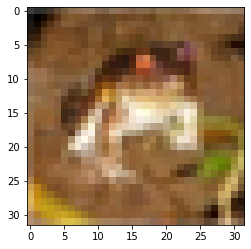

In [4]:
import matplotlib.pyplot as plt

plt.imshow(data)

In [5]:
print(type(label))
# out: <class 'int'>

print(label)
# out: 6 
# 이렇게 숫자로 보면 직관적이지 않으므로, 아래 코드를 통해 train data class의 이름을 가져옴
print(train_data.classes[label])
# out: frog

<class 'int'>
6
frog


In [6]:
test_data = CIFAR10(root="./test/", 
                    train=False, # 이 부분만 다름
                    download=True)

print(test_data)
print(len(test_data))

print(test_data.data.shape) # test 개수만 다른 것을 확인할 수 있음 
# out: (10000, 32, 32, 3)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./test/cifar-10-python.tar.gz to ./test/
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./test/
    Split: Test
10000
(10000, 32, 32, 3)


### 2) Data Transforms

변환을 해주는 이유?
- 학습을 잘 하기 위해서
- model이 사용할 수 있는 형태로 변환해 주기 위해서


In [7]:
from torchvision import transforms

train_transforms = transforms.Compose([
  transforms.RandomCrop(32, padding=4),
  transforms.RandomHorizontalFlip(),
  transforms.ToTensor(),
  transforms.Normalize(
      (0.4914, 0.4822, 0.4465),
      (0.2023, 0.1994, 0.2010))])

train_data = CIFAR10(root="./train/",
                    train=True, 
                    download=True,
                    transform=train_transforms)

print(train_data)
print(train_data.transforms)

Files already downloaded and verified
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./train/
    Split: Train
    StandardTransform
Transform: Compose(
               RandomCrop(size=(32, 32), padding=4)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )
StandardTransform
Transform: Compose(
               RandomCrop(size=(32, 32), padding=4)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )


In [8]:
# 첫번째 image만 가져와서 확인
data, label = train_data[0]

print(type(data))
# <class 'torch.Tensor'> : Tensor로 바뀐것을 확인 할 수 있음

print(data.size())
# torch.Size([3, 32, 32]) : 채널 정보가 앞으로 감 

# print(data) 

<class 'torch.Tensor'>
torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


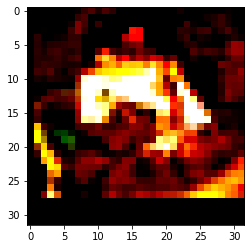

In [9]:
# permute : 차원의 순서를 변경해줌 ("3,32,32"를 "32, 32, 3"으로 변환)
plt.imshow(data.permute(1, 2, 0))

In [10]:
# test set을 불러올때도 변환을 해 줌
# 성능 향상을 위한 이미지 전처리가 필요 없음
test_transforms = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize(
      (0.4914, 0.4822, 0.4465),
      (0.2023, 0.1994, 0.2010))])

test_data = CIFAR10(
      root="./test/", 
      train=False, 
      transform=test_transforms)

print(test_data)

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./test/
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )


#### * 데이터를 직접 불러오는 방식
> - Dataset : 소스에서 data를 불러오는 것
> - DataLoader : Sampler를 통해 불러온 data의 일부만 가져옴
> - Sampler : 불러온 dataset에서 sampling해서 쓰거나, 특정 크기로 batch(잘라서 사용)

> 위 클래스들은 torch.utils.data 안에 있음 <br>
> ⭐️ 아래 코드처럼 custom한 dataset을 쓸 수 있는데, "init, len, getitem"를 정의해주어야한다⭐️

##### - Dataset class

In [12]:
# (주어진 Dataset이 없어서 코드 안돌아감)

import torch.utils.data

# Dataset를 상속받아 사용 - init, len, getitem 
class CustomImageDataset(Dataset):
  # 1. init : 초기화 할 내용 
  def __init__(self, annotations_file, img_dir, transform=None, target_transform=None): # file 경로, image경로, 변환정보, 타깃변환정보
    self.img_labels = pd.read_csv(annotations_file) 
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

  # 2. len : 데이터의 개수 반환
  def __len__(self):
    return len(self.img_labels)

  # 3. getitem : 데이터의 값 전달 
  def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)
    return image, label


##### - Data Loader class

In [13]:
# (주어진 Dataset이 없어서 코드 안돌아감)

# 주로 dataset(inputdata), batch size, shuffle, sampler  4개 사용
torch.utils.data.DataLoader(
    dataset,
    batch_size = 4,
    shuffle=False,
    sampler = None
)

### 3) Data Batching

> DataLoader class 사용

In [14]:
trainloader = torch.utils.data.DataLoader(
                    train_data, 
                    batch_size=16, 
                    shuffle=True)

# iteration 객체로 만듦
data_batch, labels_batch = next(iter(trainloader))

print(data_batch.size())
# out : torch.Size([16, 3, 32, 32]) # 32 x 32 이미지가 3채널 있고, 16개씩 데이터가 묶여서 나옴

print(labels_batch.size())

# test도 동일한 방식으로
testloader = torch.utils.data.DataLoader(
                    test_data, 
                    batch_size=16, 
                    shuffle=False)

torch.Size([16, 3, 32, 32])
torch.Size([16])


## 2.Model Development stage


### 1) Model Design
- ex) input 2, output 1개일 때, 두 개의 값을 연산하고 임계치를 넘으면 output으로 내보낼지 여부를 결정하는 활성함수를 거치는 이런 구조를 짜주는 것
- parameter : 선 (중요도 증가 : 값이 커짐 == 선이 굵어짐 == 해당 input 비중이 커짐) -> 시각적으로 표현하면, matrix로 표현됨
- 기존에 존재하는 모델의 일부만 수정하는 형태로 많이 사용( == 전이학습 )

In [15]:
from torchvision import models
vgg16 = models.vgg16(pretrained = True) #pretrained = True : 이미 학습이 된 모델 가져옴


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [16]:
# 모델 구조
print(vgg16.classifier)

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)


⭐️ The PyTorch NN Module (torch.nn) ⭐️ 

In [17]:
import torch.nn as nn
import torch.nn.functional as F

# class : Architecture block 하나 만든다라고 생각하면 됨 
class SimpleNet(nn.Module):

    # 1. init : 큰 뼈대를 잡는다
    def __init__(self):
        super(SimpleNet, self).__init__() # 초기화 
        self.fc1 = nn.Linear(2048, 256)  # (input개수, output개수) 넣으면 자동으로 만들어줌
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64,2)

    # 2. forward 
    def forward(self, x):
        x = x.view(-1, 2048) # view : shape를 바꿔줌 
        #(-1:추론을 해서 정해줌)
        #(2048개로 맞춰줌 ex) 4096 data 들어왔을때, 2048개로 맞춰 바꿔줌 == 2048 2개 생김)

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x),dim=1)
        return x

simplenet = SimpleNet()
print(simplenet)

SimpleNet(
  (fc1): Linear(in_features=2048, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2, bias=True)
)


### 2) Training
- matrix 안의 값들을 찾아주는 단계
- output(y hat)과 실제값(y)의 차이를 구해(Loss function) 가장 최소가 되도록 학습
- validation : L(y hat, y) 에서 사용

ex) LeNet5 예시

In [18]:
# Design
from torch import nn
import torch.nn.functional as F

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # <1>
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, int(x.nelement() / x.shape[0]))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

device = "cuda" if torch.cuda.is_available() else "cpu"
model = LeNet5().to(device=device)

two loop
1. epoch 단위
2. trainloader 단위

In [19]:
# Training
from torch import optim
from torch import nn

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), #   parameter 넘겨주기
                      lr=0.001, 
                      momentum=0.9)

N_EPOCHS = 10 
for epoch in range(N_EPOCHS): 

    epoch_loss = 0.0
    for inputs, labels in trainloader:
        inputs = inputs.to(device) 
        labels = labels.to(device)

        optimizer.zero_grad() 

        outputs = model(inputs)  # 예측
        loss = criterion(outputs, labels)  # loss 측정
        loss.backward() # backward
        optimizer.step() # parameter 업데이트

        epoch_loss += loss.item() # loss.item : loss의 값을 불러오는 것. loss 값을 epoch_loss에 더해라

    print("Epoch: {} Loss: {}".format(epoch, 
                  epoch_loss/len(trainloader)))


Epoch: 0 Loss: 1.9468747652435303
Epoch: 1 Loss: 1.6193600166893005
Epoch: 2 Loss: 1.501654266204834
Epoch: 3 Loss: 1.416371376914978
Epoch: 4 Loss: 1.3602591266822814
Epoch: 5 Loss: 1.3136662984848022
Epoch: 6 Loss: 1.2734754365539551
Epoch: 7 Loss: 1.2407261481189729
Epoch: 8 Loss: 1.2105141286563874
Epoch: 9 Loss: 1.1870108254241942


▶️ Validation
- 학습하는 데 사용하지 않고 에러를 측정할 때 사용
- 매 epoch마다


In [20]:
from torch.utils.data import random_split
# 학습을 하기 위해서,  trainset, validation set으로 나누는 데, 해당 코드에서는 random_split이 사용됨
train_set, val_set = random_split(
                      train_data, 
                      [40000, 10000])

trainloader = torch.utils.data.DataLoader(
                    train_set, 
                    batch_size=16, 
                    shuffle=True)

valloader = torch.utils.data.DataLoader(
                    val_set, 
                    batch_size=16, 
                    shuffle=True)

print(len(trainloader)) # 40000/16  = 2500
print(len(valloader)) # 10000/16 = 625

# from torch import optim
# from torch import nn

# model = LeNet5().to(device)
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), 
#                       lr=0.001, 
#                       momentum=0.9)

N_EPOCHS = 10
for epoch in range(N_EPOCHS):

    # Training 
    train_loss = 0.0
    model.train() # 학습을 시키겠다는 것을 알려주는 코드
    # 학습 loop
    for inputs, labels in trainloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad() # optimizer 초기화

        outputs = model(inputs)
        loss = criterion(outputs, labels) 
        loss.backward() 
        optimizer.step() 

        train_loss += loss.item()

    # Validation
    val_loss = 0.0
    model.eval() # 평가, 학습 멈춤

    for inputs, labels in valloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        val_loss += loss.item()

    print("Epoch: {} Train Loss: {} Val Loss: {}".format(
                  epoch, 
                  train_loss/len(trainloader), 
                  val_loss/len(valloader)))

2500
625


### 3) Testing
- 실제 testset으로 test
- validation이나 test set은 train 할때, 사용하지 않았던 처음 본 data를 사용해야 함 
- test set을 통해 측정된 모델의 성능 == 최종 성능

In [ ]:
num_correct = 0.0
for x_test_batch, y_test_batch in testloader:
  model.eval()
  y_test_batch = y_test_batch.to(device)
  x_test_batch = x_test_batch.to(device)
  y_pred_batch = model(x_test_batch)
  _, predicted = torch.max(y_pred_batch, 1)
  num_correct += (predicted == y_test_batch).float().sum()
  
accuracy = num_correct/(len(testloader)*testloader.batch_size) 

print(len(testloader), testloader.batch_size)
# out: 625 16

print("Test Accuracy: {}".format(accuracy))
# out: Test Accuracy: 0.6322000026702881

## 3.Model Deployment
- 배포

In [ ]:
# dictionary type으로 저장
torch.save(model.state_dict(), "./lenet5_model.pt")

# model의 구조에 저장해놨던 모델 파라미터 값을 불러와 load_state_dict 형태로 다시 불러와주면 -> 구조에 파라미터 값들이 적용됨
model = LeNet5().to(device)
model.load_state_dict(torch.load("./lenet5_model.pt"))